In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers


np.random.seed(0)

In [10]:
# Load data into dataframe
training_data_folder = 'data/asl_alphabet_train/asl_alphabet_train'
data = []

for folder in sorted(os.listdir(training_data_folder)):
    if (folder == 'del' or folder == 'nothing' or folder == 'space'):
      continue
    sub_folder = os.path.join(training_data_folder,folder)
    print(folder)
    files = [{'label':folder,'path':os.path.join(sub_folder, f)} for f in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder, f))]
    data += files

df = pd.DataFrame(data)

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# map_characters
order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
hotEncodedLabels=lb.fit_transform(order_list)
hotEncodedLabels

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [12]:

train_dir="data/asl_alphabet_train/asl_alphabet_train"

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}


order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    num=0
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        if (folder == 'del' or folder == 'nothing' or folder == 'space'):
          continue
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            # temp_img = temp_img.flatten()
            images.append(temp_img)
            labels.append(num)
        num+=1
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.8,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

In [13]:
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()

LOADING DATA FROM : R | U | I | N | G | Z | T | S | A | F | O | H | M | J | C | D | V | Q | X | E | B | K | L | Y | P | W | 
Loaded 54600 images for training, Train data shape = (54600, 64, 64, 3)
Loaded 18720 images for validation validation data shape = (18720, 64, 64, 3)
Loaded 4680 images for testing Test data shape = (4680, 64, 64, 3)


In [14]:
with tf.device('/CPU:0'):
    model = keras.models.Sequential()
   
    model.add(layers.Conv2D(8,(5,5), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(32,5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(26))
    print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [15]:
with tf.device('/CPU:0'):
    # loss and optimizer
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optim = keras.optimizers.Adam(lr=0.001)
    metrics = ["accuracy"]

In [16]:

with tf.device('/CPU:0'):
    model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [17]:
with tf.device('/CPU:0'):
    data_x=np.array(X_train)
    data_y=np.array(Y_train)

    val_x=np.array(X_validation)
    val_y=np.array(Y_validation)

    # training
    batch_size = 10
    epochs = 30
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)
    
    epochs = 15
    optim = keras.optimizers.Adam(lr=0.0001)
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)

    # evaulate

Epoch 1/30
5460/5460 - 35s - loss: 0.8614 - accuracy: 0.7275 - 35s/epoch - 6ms/step
Epoch 2/30
5460/5460 - 34s - loss: 0.1708 - accuracy: 0.9449 - 34s/epoch - 6ms/step
Epoch 3/30
5460/5460 - 34s - loss: 0.1043 - accuracy: 0.9670 - 34s/epoch - 6ms/step
Epoch 4/30
5460/5460 - 34s - loss: 0.0861 - accuracy: 0.9732 - 34s/epoch - 6ms/step
Epoch 5/30
5460/5460 - 34s - loss: 0.0689 - accuracy: 0.9795 - 34s/epoch - 6ms/step
Epoch 6/30
5460/5460 - 34s - loss: 0.0605 - accuracy: 0.9822 - 34s/epoch - 6ms/step
Epoch 7/30
5460/5460 - 33s - loss: 0.0599 - accuracy: 0.9831 - 33s/epoch - 6ms/step
Epoch 8/30
5460/5460 - 33s - loss: 0.0586 - accuracy: 0.9840 - 33s/epoch - 6ms/step
Epoch 9/30
5460/5460 - 33s - loss: 0.0544 - accuracy: 0.9850 - 33s/epoch - 6ms/step
Epoch 10/30
5460/5460 - 33s - loss: 0.0506 - accuracy: 0.9868 - 33s/epoch - 6ms/step
Epoch 11/30
5460/5460 - 33s - loss: 0.0500 - accuracy: 0.9874 - 33s/epoch - 6ms/step
Epoch 12/30
5460/5460 - 33s - loss: 0.0504 - accuracy: 0.9871 - 33s/epoch 

Epoch 1/15
5460/5460 - 33s - loss: 0.0531 - accuracy: 0.9923 - 33s/epoch - 6ms/step
Epoch 2/15
5460/5460 - 33s - loss: 0.0600 - accuracy: 0.9923 - 33s/epoch - 6ms/step
Epoch 3/15
5460/5460 - 33s - loss: 0.0577 - accuracy: 0.9931 - 33s/epoch - 6ms/step
Epoch 4/15
5460/5460 - 32s - loss: 0.0662 - accuracy: 0.9925 - 32s/epoch - 6ms/step
Epoch 5/15
5460/5460 - 33s - loss: 0.0594 - accuracy: 0.9934 - 33s/epoch - 6ms/step
Epoch 6/15
5460/5460 - 33s - loss: 0.0579 - accuracy: 0.9929 - 33s/epoch - 6ms/step
Epoch 7/15
5460/5460 - 33s - loss: 0.0585 - accuracy: 0.9930 - 33s/epoch - 6ms/step
Epoch 8/15
5460/5460 - 33s - loss: 0.0637 - accuracy: 0.9932 - 33s/epoch - 6ms/step
Epoch 9/15
5460/5460 - 33s - loss: 0.0690 - accuracy: 0.9934 - 33s/epoch - 6ms/step
Epoch 10/15
5460/5460 - 34s - loss: 0.0714 - accuracy: 0.9934 - 34s/epoch - 6ms/step
Epoch 11/15
5460/5460 - 32s - loss: 0.0695 - accuracy: 0.9933 - 32s/epoch - 6ms/step
Epoch 12/15
5460/5460 - 33s - loss: 0.0662 - accuracy: 0.9940 - 33s/epoch 

In [18]:
with tf.device('/CPU:0'):
    
    test_x=np.array(X_test)
    test_y=np.array(Y_test)
    
    
    print("test")
    
    model.evaluate(test_x,  test_y,verbose=2)
    mypred=model.predict(test_x)
    mypred=mypred.argmax(axis=1)

test
147/147 - 1s - loss: 0.0783 - accuracy: 0.9921 - 783ms/epoch - 5ms/step
147/147 [==============================] - 1s 4ms/step


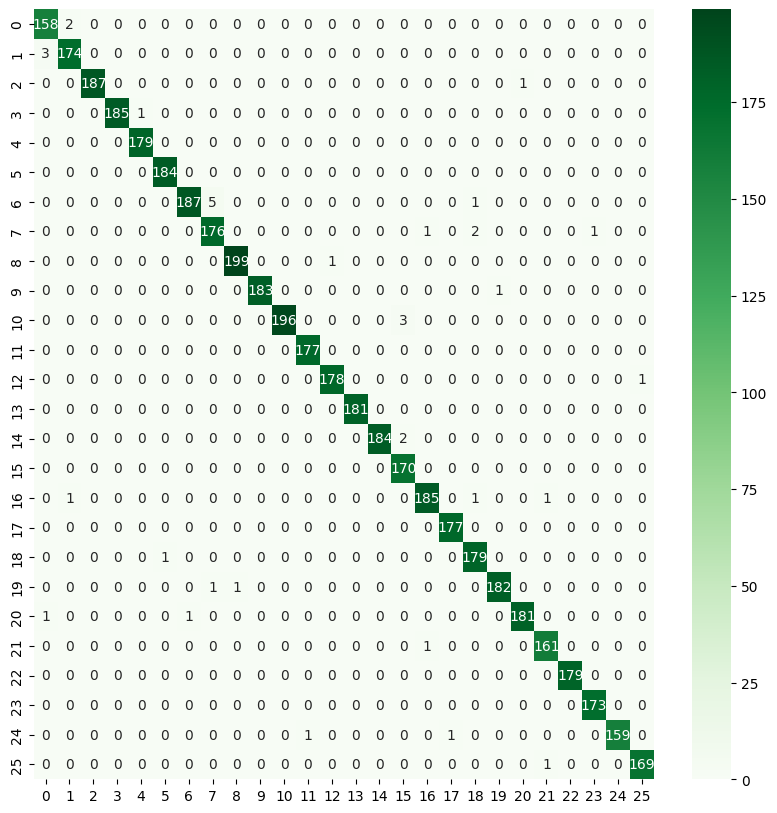

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# function to make pretty confusion matrix
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')






# create the cunfusion matrix
confussion_matrix(confusion_matrix(test_y,mypred))

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
with tf.device('/CPU:0'):
  print('Accuracy score : ', accuracy_score(Y_test, mypred))
  print('Precision score : ', precision_score(Y_test, mypred, average='weighted'))
  print('Recall score : ',recall_score(Y_test,mypred, average='weighted'))
  print('F1 score : ', f1_score(Y_test,mypred, average='weighted'))

Accuracy score :  0.9920940170940171
Precision score :  0.9921614768714149
Recall score :  0.9920940170940171
F1 score :  0.9920997618401831


In [21]:
from sklearn.metrics import classification_report
with tf.device('/CPU:0'):
  print(classification_report(Y_test,mypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       160
           1       0.98      0.98      0.98       177
           2       1.00      0.99      1.00       188
           3       1.00      0.99      1.00       186
           4       0.99      1.00      1.00       179
           5       0.99      1.00      1.00       184
           6       0.99      0.97      0.98       193
           7       0.97      0.98      0.97       180
           8       0.99      0.99      0.99       200
           9       1.00      0.99      1.00       184
          10       1.00      0.98      0.99       199
          11       0.99      1.00      1.00       177
          12       0.99      0.99      0.99       179
          13       1.00      1.00      1.00       181
          14       1.00      0.99      0.99       186
          15       0.97      1.00      0.99       170
          16       0.99      0.98      0.99       188
          17       0.99    